Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import argparse
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np
from scipy.stats import multivariate_normal

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
#like = Rosenbrock(4)
#transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run8
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=23, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=1, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_fea

In [7]:
sampler.run()

[nnest.sampler] [INFO] MCMC steps [10]
[nnest.sampler] [INFO] Initial scale [1.4142]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-7.5895e+02] max logl [-2.9326e-01] logz [-7.6586e+02] vol [1.00000e+00] ncalls [1001] mean calls [1.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-2.1110e+02] max logl [-8.6112e-02] logz [-2.1745e+02] vol [8.18731e-01] ncalls [1225] mean calls [1.5000]
[nnest.sampler] [INFO] Step [400] loglstar [-1.5756e+02] max logl [-8.6112e-02] logz [-1.6280e+02] vol [6.70320e-01] ncalls [1485] mean calls [1.5000]
[nnest.sampler] [INFO] Step [600] loglstar [-1.2710e+02] max logl [-8.6112e-02] logz [-1.3262e+02] vol [5.48812e-01] ncalls [1790] mean calls [1.5000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.0431e+02] max logl [-8.6112e-02] logz [-1.0962e+02] vol [4.49329e-01] ncalls [2155] mean calls [1.7000]
[nnest.sampler] [INFO] Step [1000] loglstar [-8.5996e+01] max logl [-8.6112e-02] logz [-9.1427e+01] vol [3.67879e-0

[nnest.sampler] [INFO] Step [4800] loglstar [-1.9682e+00] maxlogl [-1.4596e-03] logz [-7.3982e+00] vol [8.22975e-03] ncalls [29148] scale [0.1104]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0003]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.0265] validation loss [-0.0267]
[nnest.trainer] [INFO] Epoch [50] train loss [-0.0338] validation loss [-0.0327]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.0339] validation loss [-0.0328]
[nnest.trainer] [INFO] Epoch [102] ran out of patience
[nnest.trainer] [INFO] Best epoch [52] validation loss [-0.0330]
[nnest.sampler] [INFO] Acceptance [0.5200] min ESS [1.5280] max ESS [1.7950] average jump distance [0.0452]
[nnest.sampler] [INFO] Step [5000] loglstar [-1.6479e+00] maxlogl [-1.4596e-03] logz [-7.0604e+00] vol [6.73795e-03] ncalls [30794] scale [0.1882]
[nnest.sampler] [INFO] Acceptance [0.5800] min ESS [2.3465] max ESS [2.6210] average jump distance [0.1366]
[nnest.sampler] [INFO]

In [12]:
print(sampler.logz)

-5.480041018594129
46006


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())

3146.417159762234
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      8.2224323E-01  3.1652466E+00 -3.8345667E+00  3.7116432E+00  two   -3.9422733E+00  3.7898599E+00  two   -3.9471820E+00  3.7899354E+00  two     p_{1}
param2      2.9475766E-01  2.4572984E+00 -3.3668360E+00  3.2606819E+00  two   -3.4954035E+00  3.3599372E+00  two   -3.5758437E+00  3.4279153E+00  two     p_{2}



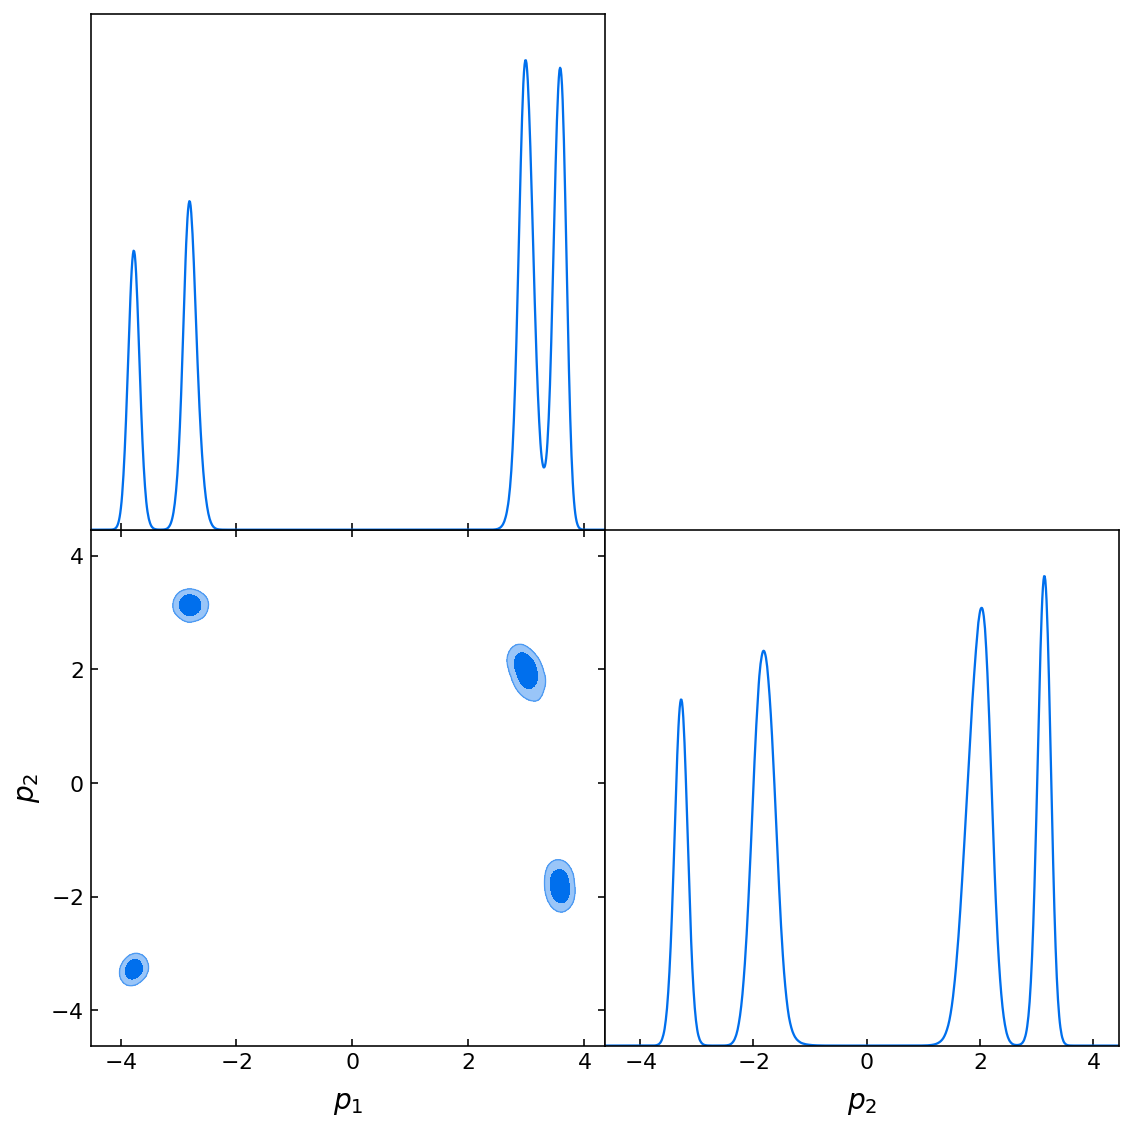

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)